In [4]:
# PROBLEMA 1

import numpy as np
import scipy.optimize as opt

x = np.array([3.8058516, 4.19437519, 1.37709166, 0.77009889, 5.20968912, 0.65358179, 3.9701773, 2.07495512, 
              3.02571317, 3.1321825, 3.10005197, 4.94755324, 2.26160675, 0.59817735, 1.19183984, 1.37467926, 
              -0.61701765, 5.01024433, 3.13300185, 5.2957513, 5.49070323, -1.13532482, -0.34934039, 5.72120588, 
              1.23276086, 4.33202401, 4.00250539, -0.40665993, 1.05709082, 3.68821387, 1.12295318, 2.10739471, 
              0.53197551, -0.27389039, 1.48139076, 0.70014346, 2.31649553, 2.44322569, 3.86141784, 2.04558533, 
              2.98230541, 3.69456416, 2.35192256, 0.11488102, 1.24948211, 2.34006925, 1.45962495, -0.09042347, 
              -0.05130358, 1.15963357, 0.56871108, 2.70715761, 2.47673624, 1.70400014, 1.60709535, -0.40534576, 
              3.07910114, 0.80967033, 5.04007949, 0.11755631, 1.427098, -0.07170736, 5.11381387, 3.54324208, 
              4.39654794, 0.10687046, 2.89288521, 4.23476606, 1.54499074, 2.68598353, -1.02087514, 1.9960533, 
              5.24364406, 3.2185187, -0.38242978, 3.49462381, 1.06077727, -0.02623431, 3.92295454, 1.48746264, 
              2.74412523, -0.29060423, 3.915251, 3.13072888, 3.78471126, -0.26904523, 0.66725871, 2.75931047, 
              2.09460576, 1.15288733, 3.08004069, 2.51581013, 1.88470954, 3.18040196, 0.85962888, -0.2126045, 
              3.2505909, 2.7800464, 1.41144019, 2.71715232])

def log_verosimilitud(params, datos):
    a, b = params
    return -np.sum(np.log(1 + np.cos((datos - b) / a)))

resultado = opt.minimize(log_verosimilitud, x0=[1, 0], args=(x,), bounds=[(0.1, None), (-np.pi, np.pi)])

a_est, b_est = resultado.x
hess_inv = resultado.hess_inv.todense()

se_a = np.sqrt(hess_inv[0, 0])
se_b = np.sqrt(hess_inv[1, 1])

z = 1.96
ic_a = (a_est - z * se_a, a_est + z * se_a)
ic_b = (b_est - z * se_b, b_est + z * se_b)

a_est, b_est, ic_a, ic_b


(454.5259686065434,
 2.167117472821888,
 (-7611.291191531288, 8520.343128744375),
 (-22.35965042449887, 26.69388537014265))

In [12]:
# PROBLEMA 2

import numpy as np
from scipy.stats import t

sample_size = len(x)
estimated_mean = np.mean(x)
std_dev = np.std(x, ddof=1)
t_value = t.ppf(0.975, df=sample_size - 1)
standard_error = std_dev / np.sqrt(sample_size)

confidence_lower = estimated_mean - t_value * standard_error
confidence_upper = estimated_mean + t_value * standard_error

print('mu', round(estimated_mean,2))
print('95% confidence interval [', round(confidence_lower,3),',', round(confidence_upper,3),']')


mu 2.13
95% confidence interval [ 1.795 , 2.473 ]


In [22]:
# PROBLEMA 3
 
import scipy.stats as s

var1 = 0.273
var2 = 0.094
ratio = var1 / var2
m1 = 10
m2 = 10
level = 0.05
dfree1 = m1 - 1
dfree2 = m2 - 1

F_l = s.f.ppf(level / 2, dfree1, dfree2)
F_u = s.f.ppf(1 - level / 2, dfree2, dfree1)
CI_lower = ratio / F_u
CI_upper = ratio / F_l


print(f"Confidence interval: ({CI_lower:.5f}, {CI_upper:.5f})")
print(f"Variance ratio: {ratio:.3f}")


Confidence interval: (0.72138, 11.69251)
Variance ratio: 2.904


In [23]:
#PROBLEMA 4

import math

total_ejecutivos_muestra = 415
ejecutivos_que_consideran_flujo_de_caja_importante = 278
nivel_confianza = 0.95

proporcion_muestra = ejecutivos_que_consideran_flujo_de_caja_importante / total_ejecutivos_muestra
z_score = 1.96
error_estandar = math.sqrt((proporcion_muestra * (1 - proporcion_muestra)) / total_ejecutivos_muestra)

margen_error = z_score * error_estandar
limite_inferior = proporcion_muestra - margen_error
limite_superior = proporcion_muestra + margen_error

intervalo_confianza = (limite_inferior, limite_superior)
intervalo_confianza


(0.6246349332007343, 0.7151241029438441)

In [25]:
# PROBLEMA 5

from math import comb

def probabilidad_y_y(p, y):
    return comb(2, y) * (p**y) * ((1 - p)**(2 - y))

def maximiza_probabilidad_y(p1, p2):
    resultados = []
    for y in range(3):
        probabilidad_y_p1 = probabilidad_y_y(p1, y)
        probabilidad_y_p2 = probabilidad_y_y(p2, y)
        
        if probabilidad_y_p1 > probabilidad_y_p2:
            resultados.append((y, p1))
        else:
            resultados.append((y, p2))
    return resultados

probabilidades_posibles_p = [1/4, 3/4]
resultados_finales = maximiza_probabilidad_y(probabilidades_posibles_p[0], probabilidades_posibles_p[1])

for resultado in resultados_finales:
    print(f"Para Y = {resultado[0]}, el valor de p que maximiza la probabilidad es {resultado[1]}")


Para Y = 0, el valor de p que maximiza la probabilidad es 0.25
Para Y = 1, el valor de p que maximiza la probabilidad es 0.75
Para Y = 2, el valor de p que maximiza la probabilidad es 0.75


In [32]:
#PROBLEMA 6

import scipy.stats as stats
import numpy as np

n_escuela_1 = 10
promedio_escuela_1 = 60
suma_cuadrados_escuela_1 = 36950
s_1_cuadrado = (suma_cuadrados_escuela_1 - (promedio_escuela_1**2 * n_escuela_1)) / (n_escuela_1 - 1)

n_escuela_2 = 10
promedio_escuela_2 = 50
suma_cuadrados_escuela_2 = 25850
s_2_cuadrado = (suma_cuadrados_escuela_2 - (promedio_escuela_2**2 * n_escuela_2)) / (n_escuela_2 - 1)

n_escuela_3 = 10
promedio_escuela_3 = 70
suma_cuadrados_escuela_3 = 49900
s_3_cuadrado = (suma_cuadrados_escuela_3 - (promedio_escuela_3**2 * n_escuela_3)) / (n_escuela_3 - 1)

nivel_significancia = 0.05

# Comparación entre Escuela 1 y Escuela 2
t_escuela_1_escuela_2 = (promedio_escuela_1 - promedio_escuela_2) / np.sqrt((s_1_cuadrado / n_escuela_1) + (s_2_cuadrado / n_escuela_2))
df_escuela_1_escuela_2 = min(n_escuela_1 - 1, n_escuela_2 - 1)
valor_p_escuela_1_escuela_2 = 2 * (1 - stats.t.cdf(abs(t_escuela_1_escuela_2), df_escuela_1_escuela_2))

# Comparación entre Escuela 1 y Escuela 3
t_escuela_1_escuela_3 = (promedio_escuela_1 - promedio_escuela_3) / np.sqrt((s_1_cuadrado / n_escuela_1) + (s_3_cuadrado / n_escuela_3))
df_escuela_1_escuela_3 = min(n_escuela_1 - 1, n_escuela_3 - 1)
valor_p_escuela_1_escuela_3 = 2 * (1 - stats.t.cdf(abs(t_escuela_1_escuela_3), df_escuela_1_escuela_3))

# Comparación entre Escuela 2 y Escuela 3
t_escuela_2_escuela_3 = (promedio_escuela_2 - promedio_escuela_3) / np.sqrt((s_2_cuadrado / n_escuela_2) + (s_3_cuadrado / n_escuela_3))
df_escuela_2_escuela_3 = min(n_escuela_2 - 1, n_escuela_3 - 1)
valor_p_escuela_2_escuela_3 = 2 * (1 - stats.t.cdf(abs(t_escuela_2_escuela_3), df_escuela_2_escuela_3))

resultado_escuela_1_escuela_2 = "Rechazar H0" if valor_p_escuela_1_escuela_2 < nivel_significancia else "No rechazar H0"
resultado_escuela_1_escuela_3 = "Rechazar H0" if valor_p_escuela_1_escuela_3 < nivel_significancia else "No rechazar H0"
resultado_escuela_2_escuela_3 = "Rechazar H0" if valor_p_escuela_2_escuela_3 < nivel_significancia else "No rechazar H0"

(valor_p_escuela_1_escuela_2, resultado_escuela_1_escuela_2), (valor_p_escuela_1_escuela_3, resultado_escuela_1_escuela_3), (valor_p_escuela_2_escuela_3, resultado_escuela_2_escuela_3)


((0.05217724279881919, 'No rechazar H0'),
 (0.054833509198952246, 'No rechazar H0'),
 (0.0014148534364044618, 'Rechazar H0'))

In [36]:
# PROBLEMA 7

import numpy as np
from scipy import stats

tipo_A = np.array([72, 78, 73, 69, 75, 74, 69, 75])
tipo_B = np.array([78, 76, 81, 74, 82, 75])
media_A = np.mean(tipo_A)
media_B = np.mean(tipo_B)
desviacion_A = np.std(tipo_A, ddof=1)
desviacion_B = np.std(tipo_B, ddof=1)

n_A = len(tipo_A)
n_B = len(tipo_B)

t_statistic = (media_A - media_B) / np.sqrt((desviacion_A**2 / n_A) + (desviacion_B**2 / n_B))

df = ((desviacion_A**2 / n_A + desviacion_B**2 / n_B)**2) / (
    ((desviacion_A**2 / n_A)**2) / (n_A - 1) + ((desviacion_B**2 / n_B)**2) / (n_B - 1))

p_value = 2 * stats.t.cdf(-abs(t_statistic), df)

print(f"Estadística t: {t_statistic}")
print(f"Valor p: {p_value}",'Rechazamos H0')

alpha = 0.10
t_critical = stats.t.ppf(1 - alpha/2, df)

intervalo_inferior = (media_A - media_B) - t_critical * np.sqrt((desviacion_A**2 / n_A) + (desviacion_B**2 / n_B))
intervalo_superior = (media_A - media_B) + t_critical * np.sqrt((desviacion_A**2 / n_A) + (desviacion_B**2 / n_B))

print(f"Intervalo de confianza del 90% para la diferencia de medias: ({intervalo_inferior}, {intervalo_superior})")


Estadística t: -2.6344668509493046
Valor p: 0.02393221723250802 Rechazamos H0
Intervalo de confianza del 90% para la diferencia de medias: (-7.649302571422986, -1.434030761910357)


In [38]:
# PROBLEMA 8

import numpy as np
from scipy import stats

material_a = np.array([1.25, 1.16, 1.33, 1.15, 1.23, 1.20, 1.32, 1.28, 1.21])
material_b = np.array([0.89, 1.01, 0.97, 0.95, 0.94, 1.02, 0.98, 1.06, 0.98])

mean_a = np.mean(material_a)
mean_b = np.mean(material_b)
std_a = np.std(material_a, ddof=1)
std_b = np.std(material_b, ddof=1)
n_a = len(material_a)
n_b = len(material_b)

t_stat, p_value = stats.ttest_ind(material_a, material_b, equal_var=False)

print(f"Media de A: {mean_a:.2f}")
print(f"Media de B: {mean_b:.2f}")
print(f"Desviación estándar de A: {std_a:.2f}")
print(f"Desviación estándar de B: {std_b:.2f}")
print(f"Valor t: {t_stat:.3f}")
print(f"Valor p: {p_value:.3f}")

alpha = 0.10
if p_value < alpha:
    print("Rechazamos la H0: Sí existe diferencia")
else:
    print("No rechazamos H0: No existe una diferencia significativa en las resistencias medias.")

Media de A: 1.24
Media de B: 0.98
Desviación estándar de A: 0.06
Desviación estándar de B: 0.05
Valor t: 9.564
Valor p: 0.000
Rechazamos la H0: Sí existe diferencia


In [43]:
# PROBLEMA 9

import numpy as np
from scipy.stats import pearsonr, t

x = np.array([89, 93, 87, 90, 89, 95, 100, 98])
y = np.array([13.0, 13.2, 13.0, 13.6, 13.3, 13.8, 14.1, 14.0])

r, _ = pearsonr(x, y)

n = len(x)
t_stat = r * np.sqrt(n - 2) / np.sqrt(1 - r**2)

df = n - 2
t_critical = t.ppf(1 - 0.025, df)

p_value = 2 * (1 - t.cdf(abs(t_stat), df))

print(r, t_stat, t_critical, p_value)
print('si dan evidencia y si ponemos alpha = 0.05 igualmente darían evidencia')


0.8914018631719388 4.817770069955911 2.4469118511449692 0.002946769695082896
si dan evidencia y si ponemos alpha = 0.05 igualmente darían evidencia


In [49]:
# PROBLEMA 10 parte 1

import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
data = {
    'Presion': [50, 50, 50, 80, 80, 80],
    'Temperatura': [100, 200, 300, 100, 200, 300],
    'Rendimiento': [21, 23, 26, 22, 23, 28]}
df = pd.DataFrame(data)
df['Temperatura_Cuadrada'] = df['Temperatura'] ** 2
# Y = beta0 + beta1*Presion + beta2*Temperatura + beta3*Temperatura^2
X = df[['Presion', 'Temperatura', 'Temperatura_Cuadrada']]
X = sm.add_constant(X)  # Agregar constante (beta0)
y = df['Rendimiento']
modelo = sm.OLS(y, X).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:            Rendimiento   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     22.56
Date:                Mon, 18 Nov 2024   Prob (F-statistic):             0.0428
Time:                        23:33:01   Log-Likelihood:                -3.1384
No. Observations:                   6   AIC:                             14.28
Df Residuals:                       2   BIC:                             13.44
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   20.3333 

/Users/kiwi/Library/Python/3.9/lib/python/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [55]:
# PROBLEMA 10 parte 2

print("# a) Los coeficientes del modelo son: beta0 = 20.3333, beta1 = 0.0333, beta2 = -0.0225, beta3 = 0.0001.")
print("# b) El valor p asociado con beta3 es 0.178. Como es mayor que 0.05, no rechazamos la hipótesis nula de que beta3 = 0.")
print("# c) El valor p asociado con beta2 es 0.459. Como es mayor que 0.05, tampoco rechazamos la hipótesis nula de que beta2 = 0, entonces la temperatura no afecta significativamente el rendimiento.")


# a) Los coeficientes del modelo son: beta0 = 20.3333, beta1 = 0.0333, beta2 = -0.0225, beta3 = 0.0001.
# b) El valor p asociado con beta3 es 0.178. Como es mayor que 0.05, no rechazamos la hipótesis nula de que beta3 = 0.
# c) El valor p asociado con beta2 es 0.459. Como es mayor que 0.05, tampoco rechazamos la hipótesis nula de que beta2 = 0, entonces la temperatura no afecta significativamente el rendimiento.


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     79.15
Date:                Mon, 18 Nov 2024   Prob (F-statistic):           3.24e-05
Time:                        23:46:18   Log-Likelihood:                -1.1098
No. Observations:                  10   AIC:                             10.22
Df Residuals:                       6   BIC:                             11.43
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.3400      0.156     59.834      0.0

/Users/kiwi/Library/Python/3.9/lib/python/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


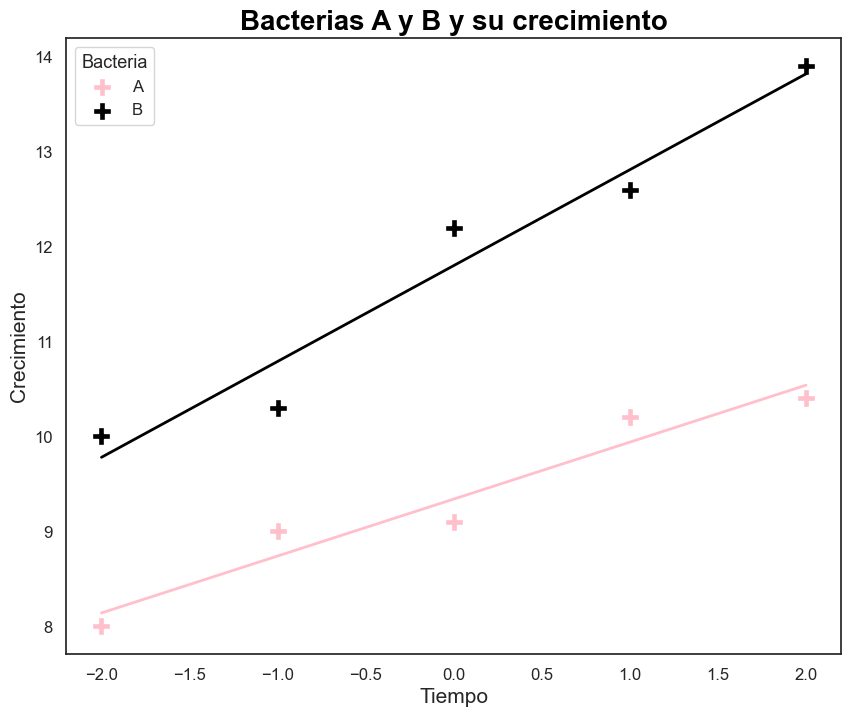

Predicción de crecimiento para la bacteria A en x2=0: 9.34
Predicción de crecimiento para la bacteria B en x2=0: 11.80
c) La predicción y la gráfica son cercanas
d) Existen diferencias significativas en los porcentajes de crecimiento entre las bacterias.


In [65]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

tiempo_codificado = np.array([-2, -1, 0, 1, 2])
crecimiento_A = np.array([8.0, 9.0, 9.1, 10.2, 10.4])
crecimiento_B = np.array([10.0, 10.3, 12.2, 12.6, 13.9])

data = pd.DataFrame({
    'x2': np.concatenate([tiempo_codificado, tiempo_codificado]),
    'Y': np.concatenate([crecimiento_A, crecimiento_B]),
    'x1': np.concatenate([np.zeros(5), np.ones(5)]),
    'x1_x2': np.concatenate([np.zeros(5), tiempo_codificado])
})

X = data[['x1', 'x2', 'x1_x2']]
X = sm.add_constant(X)
y = data['Y']

modelo = sm.OLS(y, X).fit()
print(modelo.summary())

data['predicciones'] = modelo.predict(X)

sns.set(style="white", palette="dark", font_scale=1.5)

plt.figure(figsize=(10, 8))

sns.scatterplot(x='x2', y='Y', data=data[data['x1'] == 0], color='pink', s=150, marker='P', label='A')
sns.scatterplot(x='x2', y='Y', data=data[data['x1'] == 1], color='black', s=150, marker='P', label='B')

sns.lineplot(x='x2', y='predicciones', data=data[data['x1'] == 0], color='pink', linestyle='-', linewidth=2)
sns.lineplot(x='x2', y='predicciones', data=data[data['x1'] == 1], color='black', linestyle='-', linewidth=2)

plt.title('Bacterias A y B y su crecimiento', fontsize=20, fontweight='bold', color='black')
plt.xlabel('Tiempo', fontsize=15)
plt.ylabel('Crecimiento', fontsize=15)
plt.legend(title="Bacteria", fontsize=12, title_fontsize='13')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

x2_valor = 0

X_A = np.array([1, 0, x2_valor, 0])
Y_A_pred = modelo.predict(X_A.reshape(1, -1))

X_B = np.array([1, 1, x2_valor, x2_valor])
Y_B_pred = modelo.predict(X_B.reshape(1, -1))

print(f'Predicción de crecimiento para la bacteria A en x2=0: {Y_A_pred[0]:.2f}')
print(f'Predicción de crecimiento para la bacteria B en x2=0: {Y_B_pred[0]:.2f}')
print('c) La predicción y la gráfica son cercanas')

import numpy as np
import pandas as pd
import statsmodels.api as sm

tiempo_codificado = np.array([-2, -1, 0, 1, 2])
crecimiento_A = np.array([8.0, 9.0, 9.1, 10.2, 10.4])
crecimiento_B = np.array([10.0, 10.3, 12.2, 12.6, 13.9])

data = pd.DataFrame({
    'x2': np.concatenate([tiempo_codificado, tiempo_codificado]),
    'Y': np.concatenate([crecimiento_A, crecimiento_B]),
    'x1': np.concatenate([np.zeros(5), np.ones(5)]),
    'x1_x2': np.concatenate([np.zeros(5), tiempo_codificado])
})

X = data[['x1', 'x2', 'x1_x2']]
X = sm.add_constant(X)
y = data['Y']

modelo = sm.OLS(y, X).fit()

p_valor_beta1 = modelo.pvalues['x1']
p_valor_beta3 = modelo.pvalues['x1_x2']

alpha = 0.05

if p_valor_beta1 < alpha or p_valor_beta3 < alpha:
    print("d) Existen diferencias significativas en los porcentajes de crecimiento entre las bacterias.")
else:
    print("d) No existen diferencias significativas en los porcentajes de crecimiento entre las bacterias.")


In [72]:
# PROBLEMA 12

import pandas as pd
from scipy import stats

calificaciones = {
    'Grupo': ['Grupo A', 'Grupo A', 'Grupo A', 'Grupo A', 'Grupo A', 'Grupo A',
              'Grupo B', 'Grupo B', 'Grupo B', 'Grupo B', 'Grupo B', 'Grupo B'],
    'Datos': [5.8, 3.1, 7.2, 2.6, 6.7, 4.5, 1.9, 8.5, 4.3, 6.8, 2.1, 7.4]}

df = pd.DataFrame(calificaciones)
grupo_a = df[df['Grupo'] == 'Grupo A']['Datos']
grupo_b = df[df['Grupo'] == 'Grupo B']['Datos']
f_statistic, p_value = stats.f_oneway(grupo_a, grupo_b)

print(f'Estadístico F:', round(f_statistic, 3))
print(f'Valor p:', round(p_value, 3))

if p_value < 0.05:
    print("Hay una diferencia significativa entre los grupos.")
else:
    print("No hay una diferencia significativa entre los grupos.")

Estadístico F: 0.018
Valor p: 0.897
No hay una diferencia significativa entre los grupos.


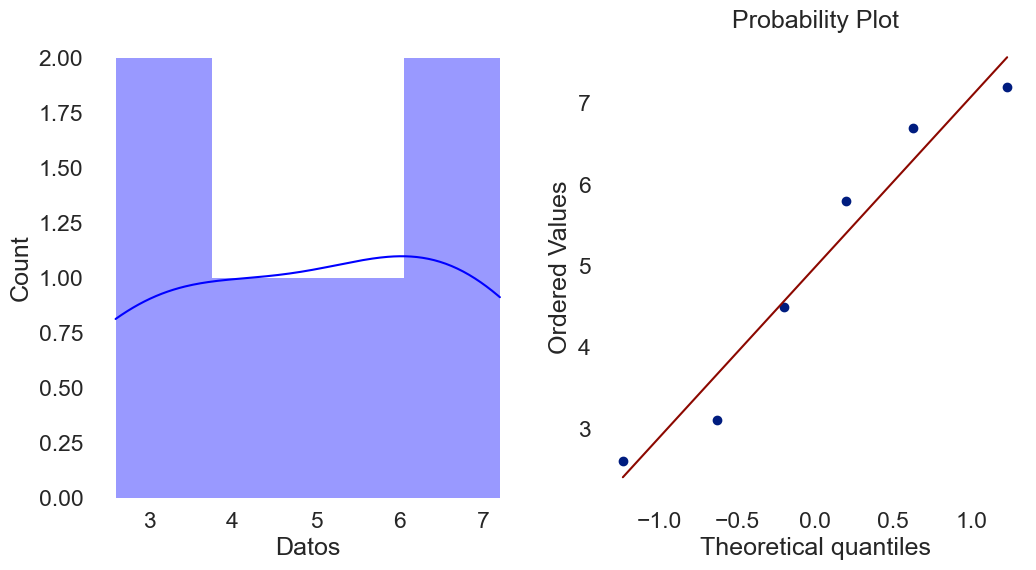

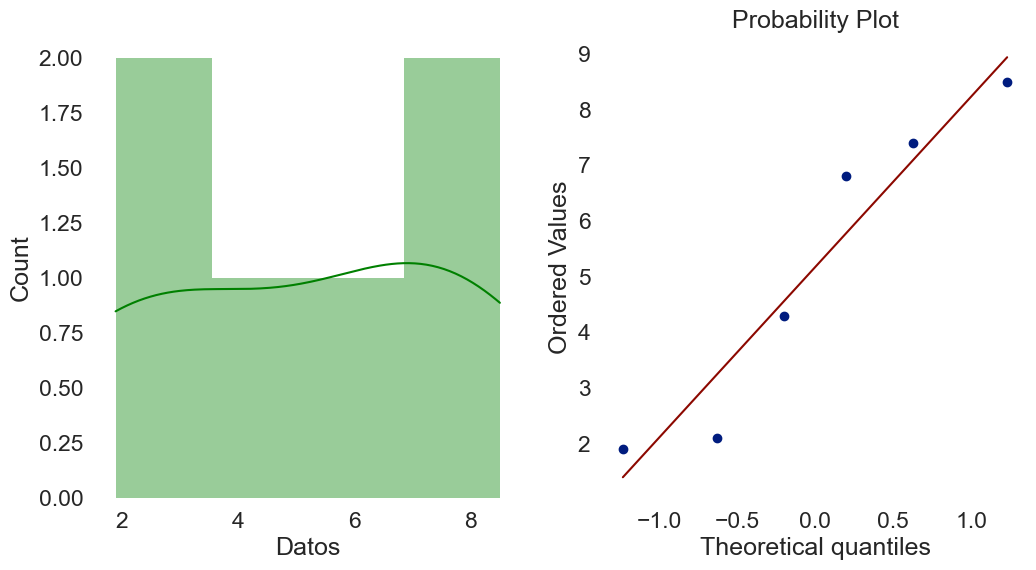

parecen normales segun las gráficas


In [76]:
# PROBLEMA 13 parte 1

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df[df['Grupo'] == 'Grupo A']['Datos'], kde=True, color='blue', alpha=0.4, linewidth=0)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().tick_params(left=False, bottom=False)

plt.subplot(1, 2, 2)
stats.probplot(df[df['Grupo'] == 'Grupo A']['Datos'], dist="norm", plot=plt)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().tick_params(left=False, bottom=False)

plt.show()


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df[df['Grupo'] == 'Grupo B']['Datos'], kde=True, color='green', alpha=0.4, linewidth=0)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().tick_params(left=False, bottom=False)

plt.subplot(1, 2, 2)
stats.probplot(df[df['Grupo'] == 'Grupo B']['Datos'], dist="norm", plot=plt)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().tick_params(left=False, bottom=False)

plt.show()

print ('parecen normales segun las gráficas')

In [77]:
# PROBLEMA 13 parte 2

import pandas as pd
from scipy import stats

df = pd.read_csv('datos.csv')

shapiro_a_stat, shapiro_a_p_value = stats.shapiro(df[df['Grupo'] == 'Grupo A']['Datos'])
shapiro_b_stat, shapiro_b_p_value = stats.shapiro(df[df['Grupo'] == 'Grupo B']['Datos'])

print(f"Grupo A - Estadístico Shapiro-Wilk: {shapiro_a_stat}, Valor p: {shapiro_a_p_value}")
print(f"Grupo B - Estadístico Shapiro-Wilk: {shapiro_b_stat}, Valor p: {shapiro_b_p_value}")

if shapiro_a_p_value < 0.05:
    print("Grupo A no sigue una distribución normal.")
else:
    print("Grupo A sigue una distribución normal.")

if shapiro_b_p_value < 0.05:
    print("Grupo B no sigue una distribución normal.")
else:
    print("Grupo B sigue una distribución normal.")

mannwhitney_stat, mannwhitney_p_value = stats.mannwhitneyu(
    df[df['Grupo'] == 'Grupo A']['Datos'], 
    df[df['Grupo'] == 'Grupo B']['Datos']
)
print(f"Estadístico Mann-Whitney U: {mannwhitney_stat}, Valor p: {mannwhitney_p_value}")

if mannwhitney_p_value < 0.05:
    print("Hay una diferencia significativa en las medianas entre los grupos.")
else:
    print("No hay diferencia significativa en las medianas entre los grupos.")

Grupo A - Estadístico Shapiro-Wilk: 0.9267433887989514, Valor p: 0.5551977358822471
Grupo B - Estadístico Shapiro-Wilk: 0.8947595168506, Valor p: 0.34388057905496955
Grupo A sigue una distribución normal.
Grupo B sigue una distribución normal.
Estadístico Mann-Whitney U: 17.0, Valor p: 0.9372294372294373
No hay diferencia significativa en las medianas entre los grupos.
